In [1]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

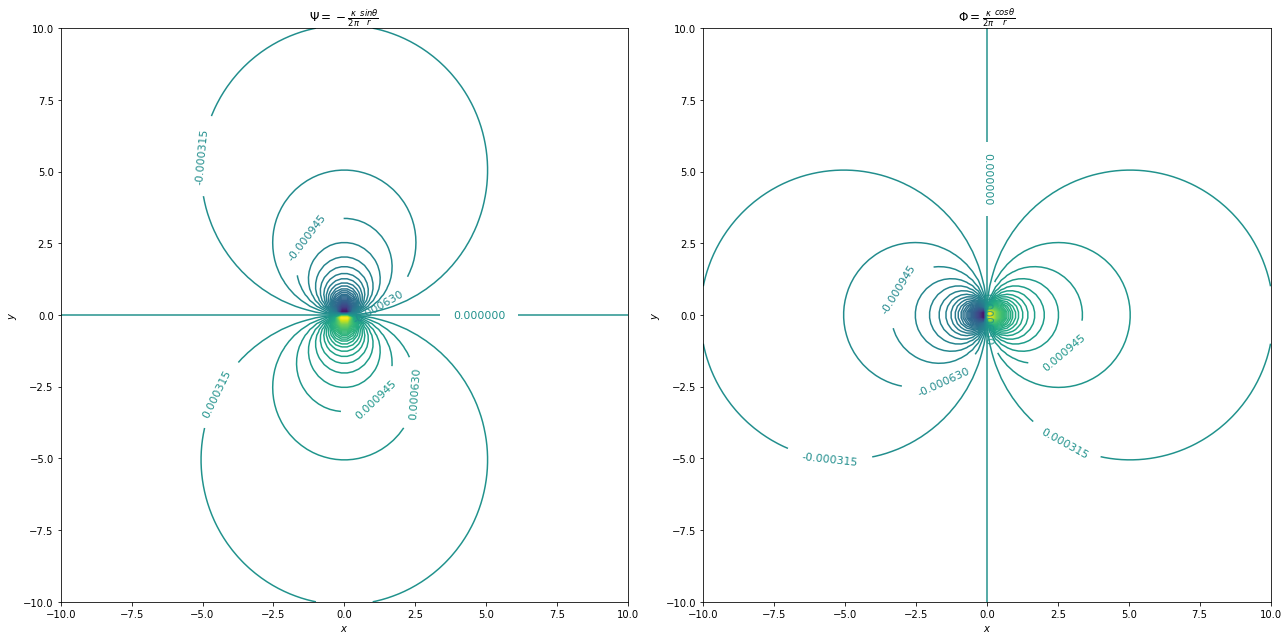

In [4]:
# HIDDEN
# Doublet Flow

# Set range
xr = 10
xl = -xr

yu = 10
yl = -yu

npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)

X, Y = np.meshgrid(x, y)

Kappa = 0.02

plt.rcParams["figure.figsize"] = (18,9)


plt.subplot(1,2,1)
Z = -Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) 
levels = np.linspace(np.min(Z),np.max(Z),101)
CS = plt.contour(X, Y, Z, levels=levels)
fmt='%1.6f'
plt.clabel(CS, inline=1, fontsize=11,fmt=fmt)
plt.title(r'$\Psi = -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}$')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.subplot(1,2,2)
Z = X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) 
CS = plt.contour(X, Y, Z, levels=levels)
plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)




#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Phi = \frac{\kappa}{2 \pi} \frac{cos\theta}{r}$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show()

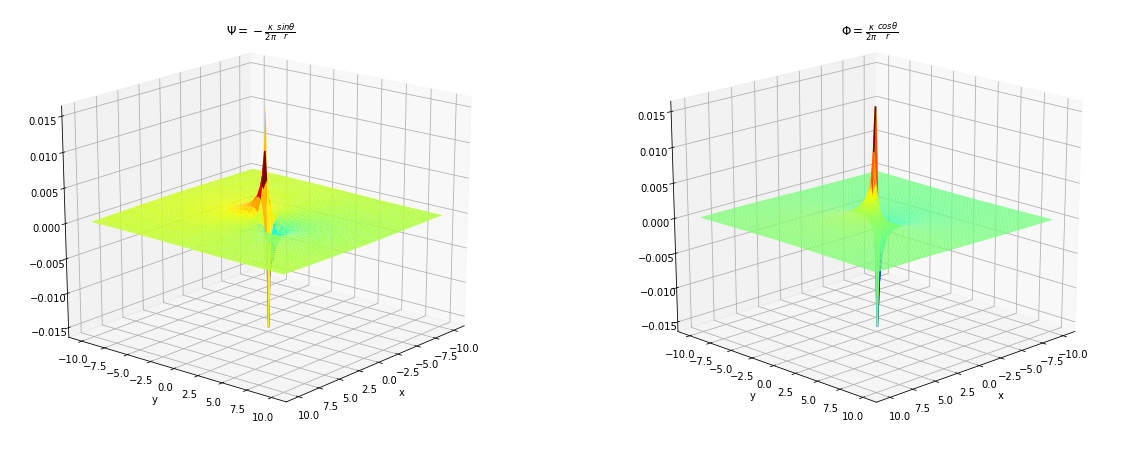

In [5]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Kappa = 0.02
Z = -Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) 
Z2 = X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2))

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi = -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(20, 40)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = \frac{\kappa}{2 \pi} \frac{cos\theta}{r}$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(20, 45)
plt.show()

In [6]:
# HIDDEN
# Doublet Flow interactive chart

def doubletPlot(C, C2, Kappa):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = -Y*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2))
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.5f'
    plt.clabel(CS, inline=1, fontsize=16, fmt=fmt)
    

    Z = X*((Kappa)/(2 * np.pi))/(np.power(X,2) + np.power(Y,2)) 
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=16, fmt=fmt)
    
#     plt.title(r'$\Psi = -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}$   and   $\Phi = \frac{\kappa}{2 \pi} \frac{cos\theta}{r}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [7]:
# HIDDEN    
interactive_plot = interactive(doubletPlot, 
                               C=widgets.FloatSlider(value=0.0003,min=-0.04,max=0.04,step=0.0002,description=r'$\Psi = -\frac{\kappa}{2 \pi} \frac{sin\theta}{r}$', style=style, layout=slider_layout), 
                               C2=widgets.FloatSlider(value=0.0003,min=-0.04,max=0.04,step=0.0002,description=r'$\Phi = \frac{\kappa}{2 \pi} \frac{cos\theta}{r}$', style=style, layout=slider_layout), 
                               Kappa=widgets.FloatSlider(value=0.0156,min=0.0001,max=0.1,step=0.00025,description=r'$\kappa$', style=style, layout=slider_layout));

interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot

interactive(children=(FloatSlider(value=0.0003, description='$\\Psi = -\\frac{\\kappa}{2 \\pi} \\frac{sin\\the…